# **Electorial Bond:**

Electoral Bonds were a mode of funding for political parties in India from their introduction in 2017 till they were struck down as unconstitutional by the Supreme Court on 15 February 2024. Following their termination, a five-judge bench headed by the Chief Justice directed the State Bank of India to hand over the identities and other details of donors and recipients to the Election Commission of India, which was in turn asked to publish them on its website.

The scheme was introduced in The Finance Bill, 2017 during the Union Budget 2017-18 by then Finance Minister Arun Jaitley. They were classified as a Money Bill, and thus bypassed certain parliamentary scrutiny processes, in what was alleged to be a violation of Article 110 of Indian constitution.(According to the Indian Constitution, Money Bills are legislation that are exempt from the requirement of being "passed" in the Rajya Sabha, as the upper house is only permitted to offer commentary on such bills introduced in Lok Sabha. Mr Jaitley also proposed to amend the Reserve Bank of India (RBI) Act in order to facilitate the issuance of electoral bonds by banks for the purpose of political funding.

Although introduced in early 2017, the Department of Economic Affairs in Ministry Of Finance notified the Electoral Bond Scheme 2018 in a Gazette only on 2 January 2018. According to an estimate, a total of 18,299 electoral bonds equivalent to a monetary value of ₹9,857 crore, were successfully transacted during the period spanning from March 2018 to April 2022.

On 7 November 2022, the Electoral Bond scheme was amended to increase the sale days from 70 to 85 in a year where any assembly election may be scheduled. The decision on Electoral Bond (Amendment) Scheme, 2022 was taken shortly prior to the assembly elections in Gujarat and Himachal Pradesh, while the Model Code of Conduct was implemented in both the states.

Ahead of the 2019 General Elections, Congress announced its intention to eliminate electoral bonds, if the party is elected to power. The Communist Party of India (Marxist) has also opposed the scheme, and was the sole national party to refuse donations through electoral bonds

In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 110.4 kB/s eta 0:00:001m112.6 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 120.1 kB/s eta 0:00:00m eta 0:00:010:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 107.6 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 58.5 kB/s eta 0:00:00m eta 0:00:010:00:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.6 kB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.5 kB/s eta 0:00:0031m20.2 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [61]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [62]:
companies = pd.read_excel("Electoral Bonds_Companies.xlsx")
companies.head()

,Date of Purchase,Purchaser Name,Denomination
0,2019-04-12,A B C INDIA LIMITED,"1,00,000"
1,2019-04-12,A B C INDIA LIMITED,"1,00,000"
2,2019-04-12,A B C INDIA LIMITED,"10,00,000"
3,2019-04-12,A B C INDIA LIMITED,"10,00,000"
4,2019-04-12,A B C INDIA LIMITED,"1,00,000"


In [63]:
political_parties = pd.read_excel("Electoral Bonds_Political Parties.xlsx")
political_parties.head()

,Date of\nEncashment,Name of the Political Party,Denomination
0,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"1,00,00,000"
3,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
4,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"


In [64]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date of Purchase  18871 non-null  datetime64[ns]
 1   Purchaser Name    18871 non-null  object        
 2   Denomination      18871 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 442.4+ KB


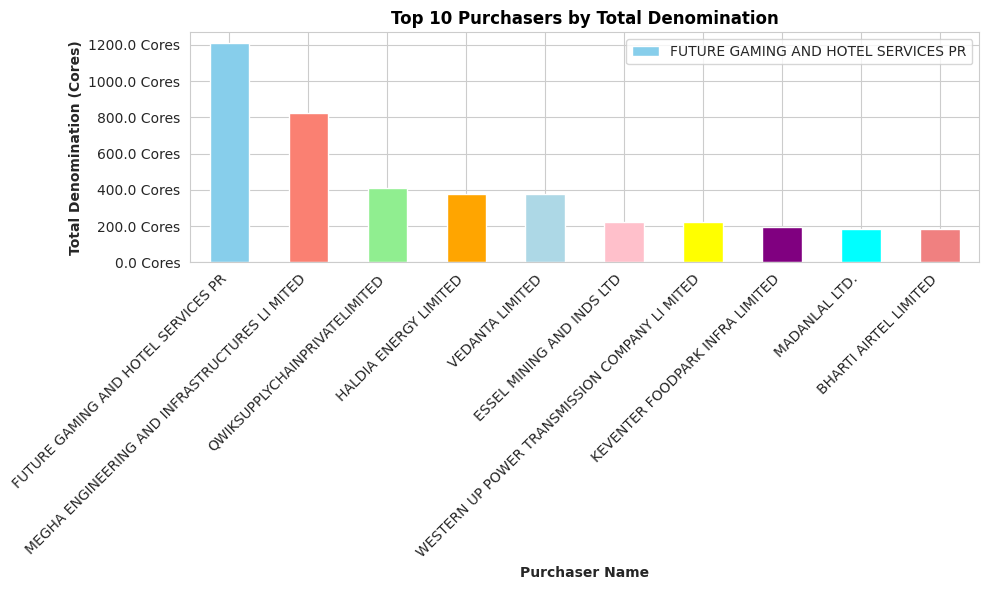

In [67]:
import matplotlib.ticker as ticker

# Remove non-numeric characters from 'Denomination' column and convert to integer
companies['Denomination'] = companies['Denomination'].astype(str).str.replace('[^\d]', '', regex=True).astype(int)

# Get the top 10 purchasers by total denomination
top_10_purchasers = companies.groupby('Purchaser Name')['Denomination'].sum().nlargest(10)

# Define colors for bars
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue', 'pink', 'yellow', 'purple', 'cyan', 'lightcoral']

# Convert ticks to cores
def cores(x, pos):
    'The two args are the value and tick position'
    return f'{x/10000000:.1f} Cores'

# Report 1: Bar plot of total denomination by top 10 purchasers
plt.figure(figsize=(10, 6))
top_10_purchasers.plot(kind='bar', color=colors)
plt.xlabel('Purchaser Name', fontweight = 'bold')
plt.ylabel('Total Denomination (Cores)', fontweight = 'bold')
plt.title('Top 10 Purchasers by Total Denomination', fontweight = 'bold', color = 'Black')
plt.xticks(rotation=45, ha='right')

# Add legend for colors
legend_labels = top_10_purchasers.index
plt.legend(legend_labels, loc='upper right')

# Format Y-axis ticks in cores
formatter = ticker.FuncFormatter(cores)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

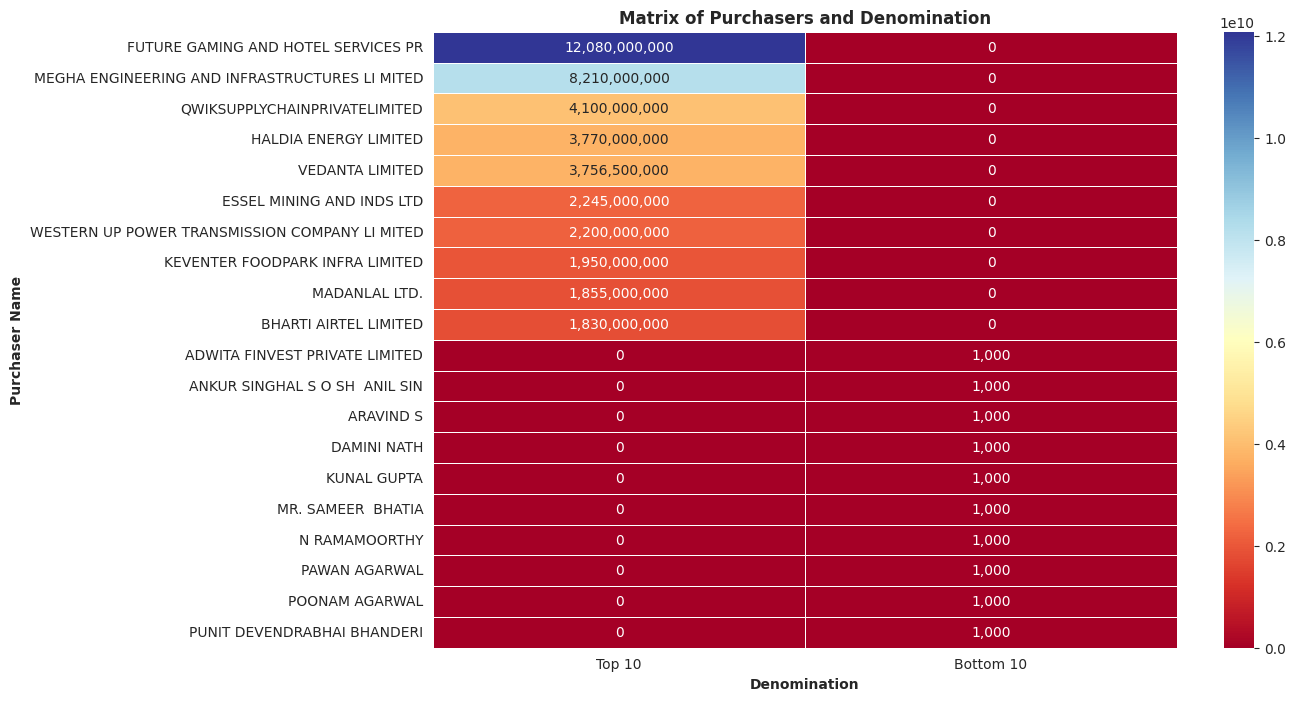

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by purchaser name and sum the denominations
purchaser_denomination = companies.groupby('Purchaser Name')['Denomination'].sum()

# Get the top 10 and bottom 10 purchasers
top_10_purchasers = purchaser_denomination.nlargest(10)
bottom_10_purchasers = purchaser_denomination.nsmallest(10)

# Create a DataFrame with top and bottom 10 purchasers
top_bottom_purchasers = pd.concat([top_10_purchasers, bottom_10_purchasers], axis=1, keys=['Top 10', 'Bottom 10'])

# Fill missing values with 0
top_bottom_purchasers.fillna(0, inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_bottom_purchasers, cmap='RdYlBu', annot=True, fmt=',.0f', linewidths=.5)
plt.title('Matrix of Purchasers and Denomination', fontweight='bold')
plt.xlabel('Denomination', fontweight='bold')
plt.ylabel('Purchaser Name', fontweight='bold')
plt.show()


In [ ]:
pip install mplcursors

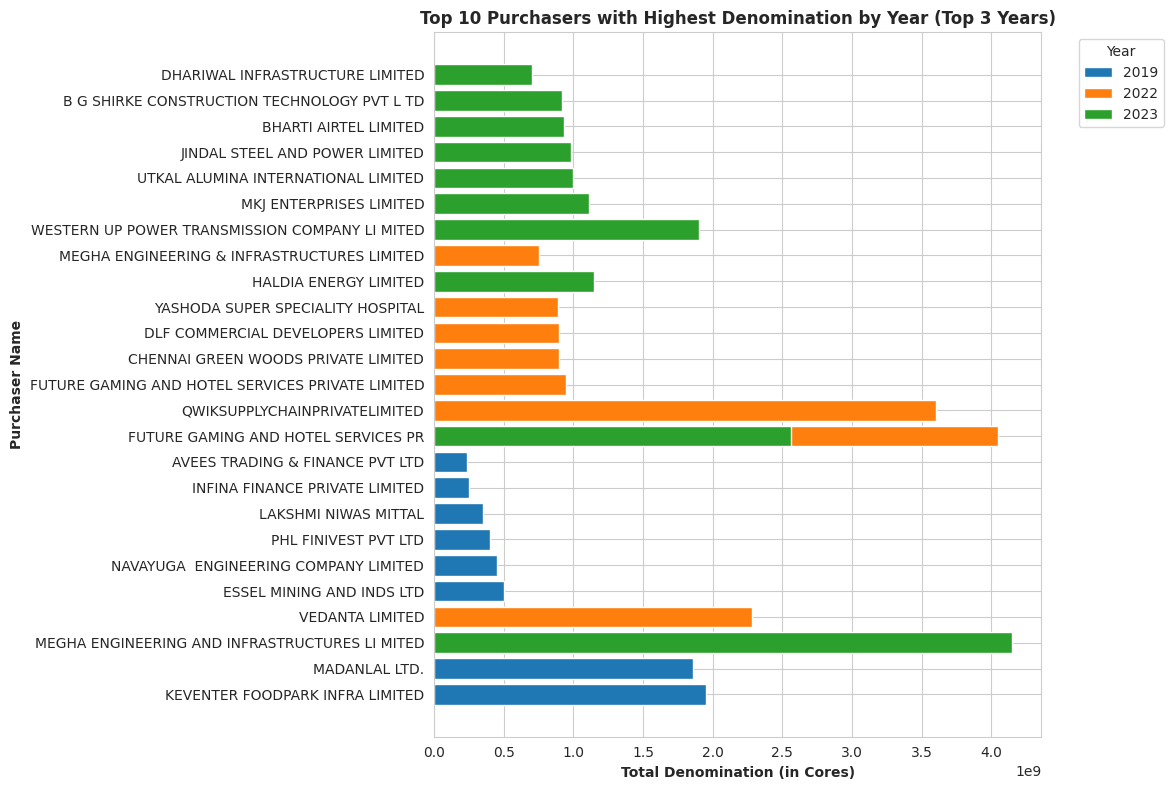

In [71]:
import mplcursors

# Extract year from 'Date of Purchase'
companies['Year'] = pd.to_datetime(companies['Date of Purchase']).dt.year

# Group by year and purchaser name, summing the denomination
yearly_purchasers = companies.groupby(['Year', 'Purchaser Name'])['Denomination'].sum()

# Find top 3 years with highest total denomination
top_3_years = yearly_purchasers.groupby('Year').sum().nlargest(3)

# Extract top 3 years from the yearly_purchasers DataFrame
top_10_purchasers_top3years = yearly_purchasers[yearly_purchasers.index.get_level_values('Year').isin(top_3_years.index)]

# Sorting the political_parties by year and total denomination within each year
top_10_purchasers_top3years = top_10_purchasers_top3years.groupby('Year').apply(lambda x: x.nlargest(10))

# Plotting
plt.figure(figsize=(12, 8))
colors = plt.cm.tab10.colors  # Colors for each year
for i, (year, purchasers) in enumerate(top_10_purchasers_top3years.groupby(level=0)):
    plt.barh(y=purchasers.index.get_level_values('Purchaser Name'), width=purchasers.values, color=colors[i], label=year)

# Enable tooltips
mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

plt.xlabel('Total Denomination (in Cores)', fontweight='bold')
plt.ylabel('Purchaser Name', fontweight='bold')
plt.title('Top 10 Purchasers with Highest Denomination by Year (Top 3 Years)', fontweight='bold')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

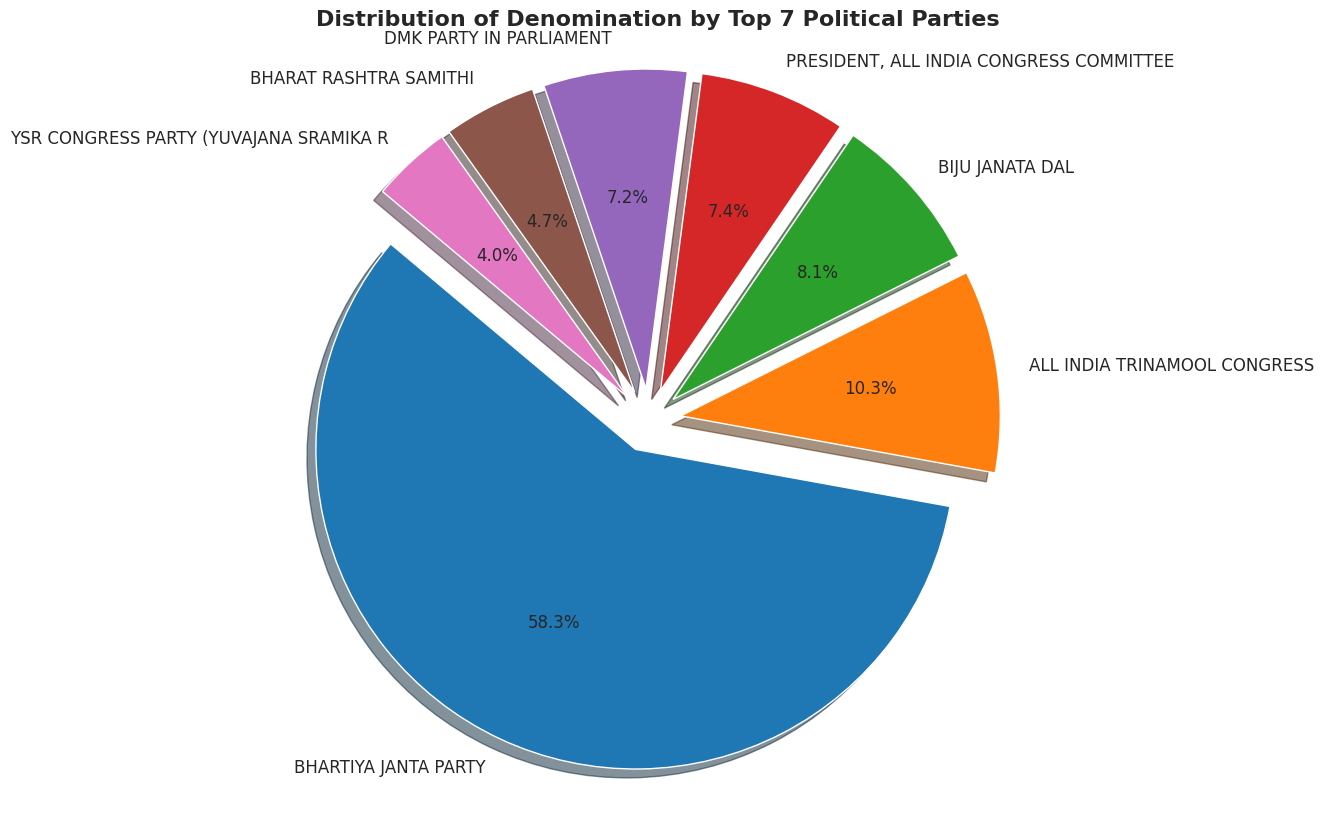

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming political_parties is your DataFrame containing the data
# Convert 'Denomination' to string and remove commas
political_parties['Denomination'] = political_parties['Denomination'].astype(str).str.replace(',', '')

# Convert 'Denomination' to integer
political_parties['Denomination'] = political_parties['Denomination'].astype(int)

# Group by political party and sum the denominations
grouped_political_parties = political_parties.groupby('Name of the Political Party')['Denomination'].sum()

# Select top 7 parties
top_7_parties = grouped_political_parties.nlargest(7)

# Create a pie chart
plt.figure(figsize=(12, 10))
plt.pie(top_7_parties.values, labels=top_7_parties.index, autopct='%1.1f%%', startangle=140, explode=[0.1] * len(top_7_parties), shadow=True, textprops={'fontsize': 12})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Denomination by Top 7 Political Parties', fontsize=16, fontweight='bold')
plt.show()
